In [1]:
!python -V

Python 3.7.13


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [40]:
df = pd.read_parquet('fhv_tripdata_2021-01.parquet')

print(df.shape)

(1154112, 7)


In [41]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

print(df['duration'].mean())

19.1672240937939


In [42]:
previous_records= len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]
new_records = len(df)

dropped_records_size = previous_records - new_records
print(dropped_records_size)

44286


In [43]:
number_of_nans = df['PUlocationID'].isna().sum()

fraction = 100*number_of_nans/len(df)

print(fraction)

83.52732770722618


In [44]:
df['DOlocationID'] = df['DOlocationID'].fillna(-1)
df['PUlocationID'] = df['PUlocationID'].fillna(-1)

In [55]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.050000


In [64]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].astype(str)

In [65]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

print(X_train.shape[1])

525


In [66]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519107210744

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


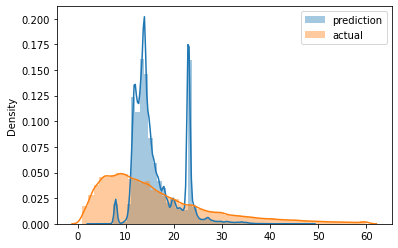

In [67]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [93]:
df_val = pd.read_parquet('fhv_tripdata_2021-02.parquet')

In [94]:
df_val['duration'] = df_val.dropOff_datetime - df_val.pickup_datetime
df_val.duration = df_val.duration.apply(lambda td: td.total_seconds() / 60)

In [95]:
df_val = df_val[(df_val.duration >= 1) & (df_val.duration <= 60)]

In [87]:
df_val['DOlocationID'] = df_val['DOlocationID'].fillna(-1)
df_val['PUlocationID'] = df_val['PUlocationID'].fillna(-1)

In [96]:
df_val[categorical] = df_val[categorical].astype(str)

In [97]:
val_dicts = df_val[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [98]:
y_val = df_val['duration'].values

In [99]:
y_val_pred = lr.predict(X_val)

mean_squared_error(y_val, y_val_pred, squared=False)

11.364434369457998